In [190]:
pip install community

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for community: filename=community-1.0.0b1-py3-none-any.whl size=2143 sha256=740d05000278b5a339840aab0f31ff22c668b0f8ccf5e0e17b85b313e2985c9f
  Stored in directory: c:\users\valen\appdata\local\pip\cache\wheels\6e\5e\52\69ce98b5cfcb76c9952e9a425b2f508e2bc83e16cb7b4d2df7
Successfully built community
Note: you may need to restart the kernel to use updated packages.


In [1]:
from MFDFA import MFDFA

import pyedflib
import glob as gl
import matplotlib.image as mpimg
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from numpy.fft import fft, fftfreq
from scipy import signal
import matplotlib.pyplot as plt
from mne.time_frequency.tfr import morlet
from mne.viz import plot_filter, plot_ideal_filter
import mne
import pandas as pd

In [40]:
def estetica(figura,x_name = '',y_name = '',title = '',w = 400,h = 325):
    
    figura.update_xaxes(showgrid=True,showline=True, linewidth=2, linecolor='black', mirror=True,title = x_name)#'cccccccccccccccc')
    figura.update_yaxes(showgrid=True,showline=True, linewidth=2, linecolor='black', mirror=True,title =y_name)


    figura.update_layout(
        margin=dict(l=20, r=20, t=40, b=20),
        plot_bgcolor="white",
        template="plotly_white", 
        title=title,
        autosize=False,
        width=w,
        height=h,
        font= dict(family="Arial",size=18,color="Black"),
        #yaxis = dict(range=[0,1]),
        #xaxis = dict(range=[0,1]),
        title_font = dict(size =20),
        legend=dict(orientation = 'v',
                    font = dict(size = 4),
                     yanchor="top",
                     y=0.95,
                     xanchor="right",
                     x=1,
                     bgcolor='rgba(255,255,255,0)',
                   )
    )
    
    

def filtroFIR(sig, fp = 0, fl=30):
    
    import mne
    import numpy as np
    sfreq = 256
    f_p = fp
    f_l = fl
    transition_band = 0.25 * f_p
    f_s = f_p + transition_band
    
    if f_l == 0:
        h = mne.filter.create_filter(sig, sfreq, l_freq=None, h_freq=f_p,
                                    fir_design='firwin2', verbose=True)  
    else:
         h = mne.filter.create_filter(sig, sfreq, l_freq=f_l, h_freq=f_p,
                                    fir_design='firwin2', verbose=True)
    sig_filtrada = np.convolve(h, sig)[len(h) // 2:]
    return sig_filtrada


def leer_con_protocolo_monopolar(sample_dir,fp,fl):
    import pyedflib 
    
    f = pyedflib.EdfReader(sample_dir )
    signal_labels = f.getSignalLabels()
    evento = np.zeros((3, f.getNSamples()[0]))
    n_canales = 21
    if fl== 0:
        sigbufs = np.zeros((22, f.getNSamples()[0]+113))
    else:
        sigbufs = np.zeros((22, f.getNSamples()[0]+3379))   
    
    for i in range(21):
        sigbufs[i, :] = filtroFIR(f.readSignal(i),fp,fl) #Fp1-F3
    evento[1, :] = f.readSignal(30)
    evento[2, :] = f.readSignal(31)

    return n_canales, signal_labels,evento, sigbufs


def Hv_a_df(signals, etiquetas):
    import pandas as pd
    import numpy as np
    
    
    df = pd.DataFrame()
    canal =0 
    for canal in range(20):
        df[etiquetas[canal]] = signals[canal]
      
    return df           
 

In [35]:
signal_labels[1]

'F3-Ref'

In [172]:
import glob as gl

ventana = 100
salto = 1
lag = np.unique(np.logspace(6, 10, 11, base = 2).astype(int))
q = 2
order = 1

fp = 30
fl = 0

Con = gl.glob(r"C:\Users\valen\OneDrive\Escritorio\Universidad\NeuFiSur\EEGs\Epilepticos\*")
Sin =   gl.glob(r"C:\Users\valen\OneDrive\Escritorio\Universidad\NeuFiSur\EEGs\Neurotipicos\*")


paciente = 4

n_canales, signal_labels, eventoC,Con_Epilepcia= leer_con_protocolo_monopolar(Con[paciente],fp,fl)

    
n_canales, signal_labels, eventoS, Sin_Epilepcia= leer_con_protocolo_monopolar(Sin[paciente],fp,fl)




Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed frequency-domain design (firwin2) method
- Hamming window
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 227 samples (0.887 s)

Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed frequency-domain design (firwin2) method
- Hamming window
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 227 samples (0.887 s)

Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed frequency-domain design (firwin2) method
- Hamming window
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB 

In [173]:
nodes = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]

df_Epilepticos = Hv_a_df(Con_Epilepcia,nodes)
df_Neurotipicos = Hv_a_df(Sin_Epilepcia,nodes)

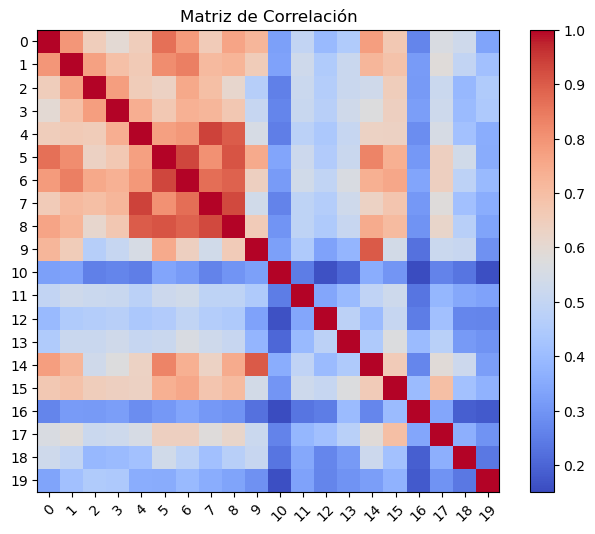

In [198]:
corr_matrix = df_Epilepticos.corr()


plt.figure(figsize=(8, 6))
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(np.arange(len(corr_matrix.columns)), corr_matrix.columns, rotation=45)
plt.yticks(np.arange(len(corr_matrix.columns)), corr_matrix.columns)
plt.title('Matriz de Correlación')
plt.show()

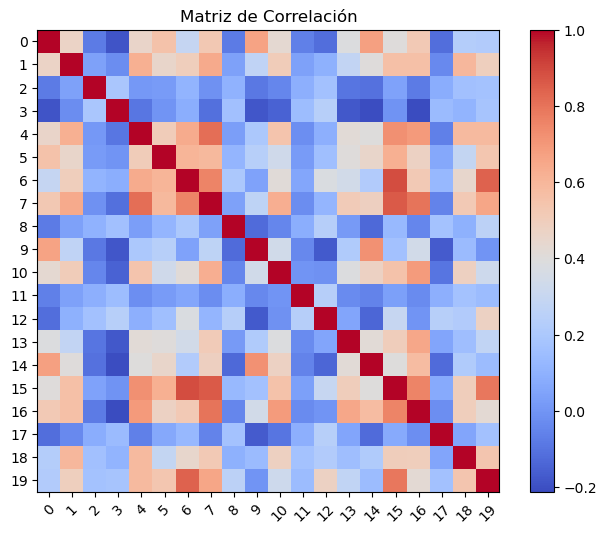

In [200]:
corr_matrix = df_Neurotipicos.corr()

plt.figure(figsize=(8, 6))
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(np.arange(len(corr_matrix.columns)), corr_matrix.columns, rotation=45)
plt.yticks(np.arange(len(corr_matrix.columns)), corr_matrix.columns)
plt.title('Matriz de Correlación')
plt.show()

c:\Users\valen\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


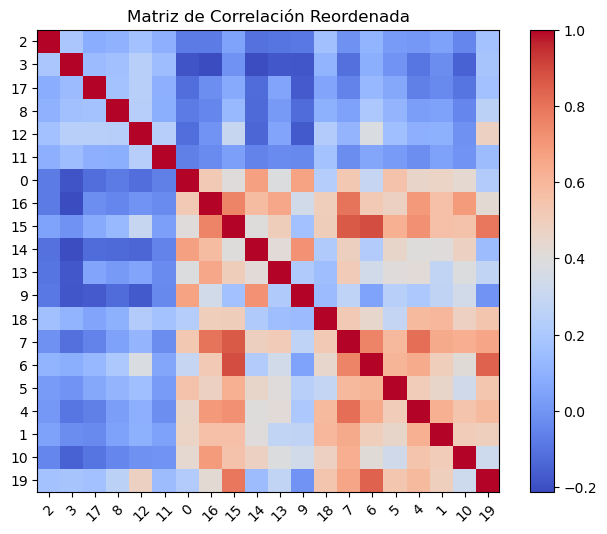

In [201]:
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import squareform

distance_matrix = 1 - np.abs(corr_matrix)


distance_vector = squareform(distance_matrix)


n_clusters = 4  
clustering = AgglomerativeClustering(n_clusters=n_clusters, affinity='precomputed', linkage='average')
cluster_labels = clustering.fit_predict(distance_matrix)


cluster_indices = np.argsort(cluster_labels)
reordered_matrix = corr_matrix.iloc[cluster_indices, :]
reordered_matrix = reordered_matrix.iloc[:, cluster_indices]


plt.figure(figsize=(8, 6))
plt.imshow(reordered_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(np.arange(len(reordered_matrix.columns)), reordered_matrix.columns, rotation=45)
plt.yticks(np.arange(len(reordered_matrix.columns)), reordered_matrix.columns)
plt.title('Matriz de Correlación Reordenada')
plt.show()



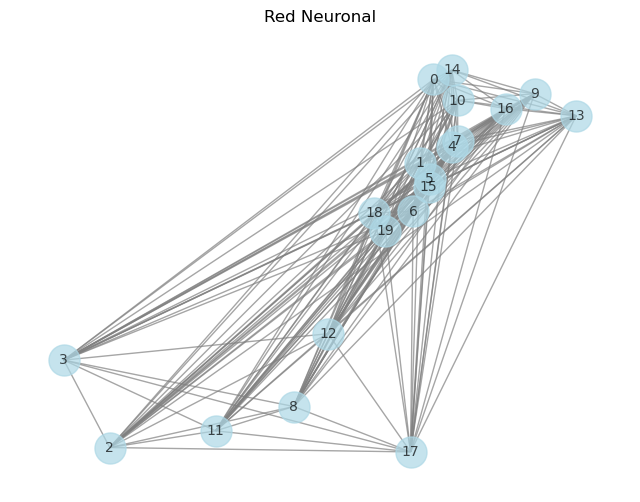

In [202]:
import pandas as pd
import numpy as np
import networkx as nx

graph = nx.Graph()


for node in corr_matrix.columns:
    graph.add_node(node)
    
for i, node1 in enumerate(corr_matrix.columns):
    for j, node2 in enumerate(corr_matrix.columns):
        if i != j:
            weight = corr_matrix.iloc[i, j]
            graph.add_edge(node1, node2, weight=weight)


plt.figure(figsize=(8, 6))
pos = nx.spring_layout(graph)
nx.draw_networkx(graph, pos, with_labels=True, node_size=500, node_color='lightblue',
                 font_size=10, font_color='black', edge_color='gray', width=1, alpha=0.7)
labels = nx.get_edge_attributes(graph, 'weight')

plt.title('Red Neuronal')
plt.axis('off')
plt.show()


In [203]:
correlation_degree = corr_matrix.abs().sum(axis=1)

for node, degree in correlation_degree.items():
    print(f"Nodo {node}: {degree}")

Nodo 0: 7.459331210467646
Nodo 1: 7.62663810393067
Nodo 2: 2.7076575789988326
Nodo 3: 3.6091456061553235
Nodo 4: 8.490364301111972
Nodo 5: 7.433096430651284
Nodo 6: 8.466674408108805
Nodo 7: 9.410327396793548
Nodo 8: 3.1154652740193827
Nodo 9: 5.401942911067608
Nodo 10: 7.453320112979383
Nodo 11: 2.4035581056661126
Nodo 12: 4.45090660519265
Nodo 13: 6.372248997157688
Nodo 14: 7.326995911706329
Nodo 15: 9.310107831742696
Nodo 16: 8.904635582794622
Nodo 17: 2.954267746498384
Nodo 18: 7.023605078555628
Nodo 19: 8.24380052915804


In [147]:
abs_corr_matrix = np.abs(corr_matrix)

row_sums = np.sum(abs_corr_matrix, axis=1)

sorted_indices = np.argsort(row_sums)


abs_corr_matrix


,Fp1-Ref,F3-Ref,C3-Ref,P3-Ref,O1-Ref,F7-Ref,T3-Ref,T5-Ref,A1-Ref,Fp2-Ref,F4-Ref,C4-Ref,P4-Ref,O2-Ref,F8-Ref,T4-Ref,T6-Ref,A2-Ref,Fz-Ref,Cz-Ref
Fp1-Ref,1.000000,0.235443,0.254552,0.200073,0.130957,0.144487,0.079451,0.123413,0.029448,0.275099,0.132995,0.296272,0.228029,0.122451,0.243301,0.184715,0.191728,0.126514,0.078383,0.202672
F3-Ref,0.235443,1.000000,0.387813,0.333458,0.248361,0.298050,0.170050,0.212347,0.111598,0.276679,0.170644,0.446257,0.386991,0.241494,0.207595,0.276265,0.279017,0.189424,0.101284,0.306812
C3-Ref,0.254552,0.387813,1.000000,0.595811,0.266375,0.184602,0.147703,0.210838,0.044578,0.294250,0.148619,0.644857,0.471435,0.304257,0.326747,0.300936,0.304995,0.172687,0.143485,0.549282
P3-Ref,0.200073,0.333458,0.595811,1.000000,0.501755,0.148163,0.172807,0.317012,0.048029,0.269123,0.190892,0.594073,0.644875,0.429439,0.306071,0.334618,0.393957,0.220748,0.119378,0.517158
O1-Ref,0.130957,0.248361,0.266375,0.501755,1.000000,0.095410,0.116938,0.386444,0.040126,0.203180,0.072452,0.398660,0.517901,0.445429,0.213153,0.251532,0.312519,0.136180,0.046470,0.453810
F7-Ref,0.144487,0.298050,0.184602,0.148163,0.095410,1.000000,0.121877,0.133487,0.012599,0.156389,0.076378,0.279057,0.245512,0.149754,0.137018,0.193928,0.189804,0.171947,0.048031,0.158993
T3-Ref,0.079451,0.170050,0.147703,0.172807,0.116938,0.121877,1.000000,0.361760,0.059718,0.116665,0.052335,0.208203,0.203925,0.108759,0.104379,0.136572,0.163355,0.079398,0.082433,0.163018
T5-Ref,0.123413,0.212347,0.210838,0.317012,0.386444,0.133487,0.361760,1.000000,0.141943,0.168349,0.070167,0.297820,0.325244,0.239490,0.170683,0.203320,0.261368,0.150541,0.071542,0.243247
A1-Ref,0.029448,0.111598,0.044578,0.048029,0.040126,0.012599,0.059718,0.141943,1.000000,0.058591,0.010758,0.061736,0.047153,0.034493,0.002866,0.036551,0.046667,0.098583,0.118251,0.047924
Fp2-Ref,0.275099,0.276679,0.294250,0.269123,0.203180,0.156389,0.116665,0.168349,0.058591,1.000000,0.019590,0.358056,0.311028,0.171671,0.288924,0.223931,0.203001,0.169721,0.082985,0.225982
